<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/airline_passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Importing Data**

In [2]:
#Load the dataset
airline = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv')
airline.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


### **Data Preprocessing**

In [3]:
# Get information on the dataset
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
#Setting the month to be the index
airline.index = airline['Month']

In [5]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.4+ KB


In [6]:
airline.head()

,Month,Passengers
Month,,
1949-01,1949-01,112
1949-02,1949-02,118
1949-03,1949-03,132
1949-04,1949-04,129
1949-05,1949-05,121


In [7]:
#Drop the month column
airline.drop('Month',axis=1, inplace=True)

In [8]:
airline.head()

,Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [9]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 1949-01 to 1960-12
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2+ KB


In [10]:
#Change the index column to be as a date
airline.index = pd.to_datetime(airline.index)

In [11]:
airline.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


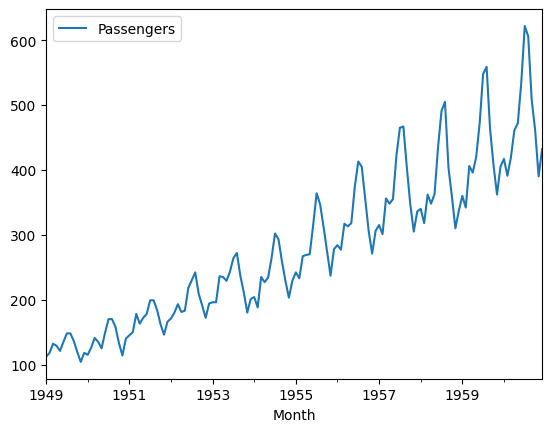

In [12]:
#Plot the dataset
airline.plot()
plt.show()

## **Decompose time series**

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose


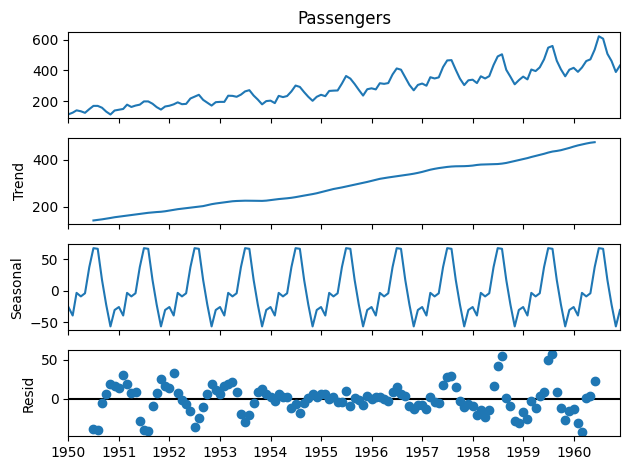

In [21]:

#Decompose the time series
result = seasonal_decompose(airline['Passengers'], model='additive', period=12)
result.plot()
plt.show()

## **Checking for stationerity in  a time series data**

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
result = adfuller(airline['Passengers'])
print('ADF statistics: %f '% result[0])
print('p-value: %f' %result[1])

ADF statistics: 0.688129 
p-value: 0.989598


# **Explaining lagged features**

Imagine you're watching a TV show with episodes that build on each other. What happened in the last episode often affects what happens in the next one, right?

In time series data, each data point is like an episode in a series, and "lagged features" are like remembering what happened in previous episodes to understand what's happening now.


The essence of creating lagged features in time series data revolves around leveraging historical information to make more accurate predictions about the future. Here's a more detailed explanation:

1. Capturing Temporal Patterns
Lagged features help capture temporal patterns and trends that may be present in the data. For example, if sales tend to increase after a holiday, lagged features can help the model recognize and learn this pattern.

2. Understanding Dependencies
In time series data, current values often depend on past values. By creating lagged features, you allow the model to understand these dependencies. For instance, in weather forecasting, today's temperature might depend on the temperatures from the last few days.

3. Improving Model Performance
Including lagged features can enhance the performance of predictive models by providing additional context. For example, knowing the sales from the previous days can help in predicting future sales more accurately.

4. Identifying Seasonal Effects
Lagged features can help in identifying and modeling seasonal effects. For example, a store may experience a surge in sales during specific seasons or holidays. By including lagged features, the model can better understand these seasonal variations.

5. Mitigating Overfitting
Incorporating lagged features can help mitigate overfitting, as the model can focus on relevant historical data rather than fitting to noise. By considering previous time points, the model becomes more robust to fluctuations and anomalies in the data.

6. Providing a Time-Aware Perspective
Lagged features make the model aware that data points are ordered in time. This awareness can be crucial for accurate forecasting, especially in cases where the past influences the future significantly.

In summary, lagged features are a way of incorporating the history of a time series into a predictive model, providing it with a richer and more informative dataset to learn from. They help the model understand how past events impact future outcomes, leading to more accurate and reliable predictions.

In [15]:
#Example data
data = {'date': pd.date_range(start='2024-01-01', periods=10, freq='D'),
        'sales': [200, 220, 210, 230, 240, 250, 260, 280, 270, 290]}

#Change to df
df2 = pd.DataFrame(data)
df2

,date,sales
0,2024-01-01,200
1,2024-01-02,220
2,2024-01-03,210
3,2024-01-04,230
4,2024-01-05,240
5,2024-01-06,250
6,2024-01-07,260
7,2024-01-08,280
8,2024-01-09,270
9,2024-01-10,290


In [16]:
#How ro create lagged features
df2['sales_lag1'] = df2['sales'].shift(1)
df2['sales_lag2'] = df2['sales'].shift(2)
df2['sales_lag3'] = df2['sales'].shift(3)
df2

,date,sales,sales_lag1,sales_lag2,sales_lag3
0,2024-01-01,200,NaN,NaN,NaN
1,2024-01-02,220,200.0,NaN,NaN
2,2024-01-03,210,220.0,200.0,NaN
3,2024-01-04,230,210.0,220.0,200.0
4,2024-01-05,240,230.0,210.0,220.0
5,2024-01-06,250,240.0,230.0,210.0
6,2024-01-07,260,250.0,240.0,230.0
7,2024-01-08,280,260.0,250.0,240.0
8,2024-01-09,270,280.0,260.0,250.0
9,2024-01-10,290,270.0,280.0,260.0


In [17]:
#drop the rows with Nan values
df2.dropna(inplace=True)
df2

,date,sales,sales_lag1,sales_lag2,sales_lag3
3,2024-01-04,230,210.0,220.0,200.0
4,2024-01-05,240,230.0,210.0,220.0
5,2024-01-06,250,240.0,230.0,210.0
6,2024-01-07,260,250.0,240.0,230.0
7,2024-01-08,280,260.0,250.0,240.0
8,2024-01-09,270,280.0,260.0,250.0
9,2024-01-10,290,270.0,280.0,260.0


### **Creating lagged features**

Capture patterns and relationships that occur overtime

In [18]:
def create_lag_features(df, lag=1):
  for i in range(1, lag+1):
    df[f'lag_{i}'] = df['Passengers'].shift(i)
  return df


In [19]:
# Create the lag features
df_lagged = create_lag_features(airline, lag=12)
df_lagged.dropna(inplace=True)
df_lagged.head()

,Passengers,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7,lag_8,lag_9,lag_10,lag_11,lag_12
Month,,,,,,,,,,,,,
1950-01-01,115,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0,112.0
1950-02-01,126,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0,118.0
1950-03-01,141,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0,132.0
1950-04-01,135,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0,129.0
1950-05-01,125,135.0,141.0,126.0,115.0,118.0,104.0,119.0,136.0,148.0,148.0,135.0,121.0


In [29]:
#Prepare the data , splitting the data into train-test-split
from sklearn.model_selection import train_test_split


In [31]:
#Split the data
X = df_lagged.drop('Passengers', axis=1)
y = df_lagged['Passengers']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### **Decision Trees**

In [33]:
from sklearn.tree import DecisionTreeRegressor


In [34]:
#Train the tree regressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [35]:
#Evaluate the model
from sklearn.metrics import mean_squared_error

#Predict and evaluate
y_pred = tree_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse}')

Mean squared error: 2017.5555555555557


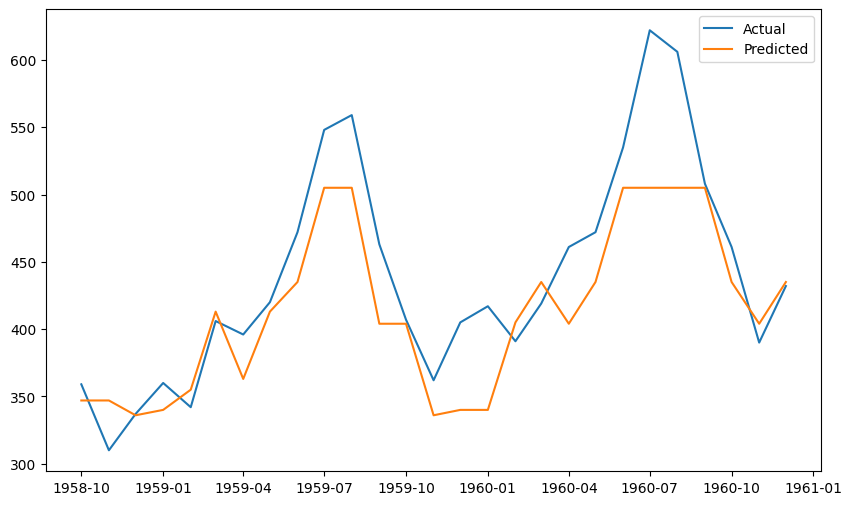

In [36]:
#Plot the predictions
plt.figure(figsize=(10,6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.legend()
plt.show()

### **Visualizing the trees**

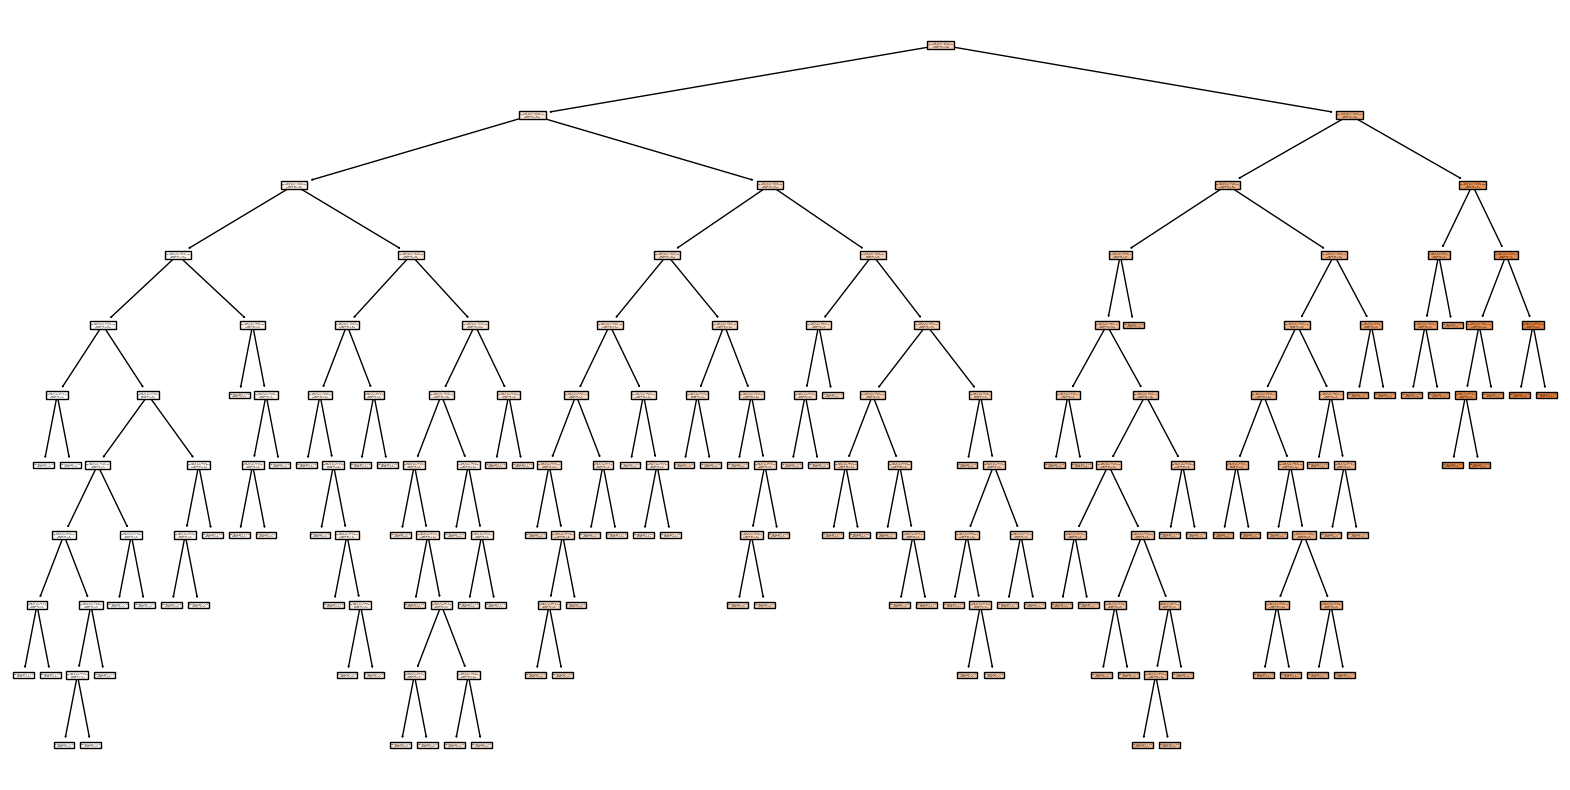

In [37]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True)
plt.show()

### **Random Forests**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#Train the random forest regressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

In [ ]:
#Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error(random Forest): {mse_rf}')

In [ ]:
#Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, y_pred_rf, label='Predicted')
plt.legend()
plt.show()